In [1]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
plt.style.use("fivethirtyeight")
matplotlib.rcParams["axes.labelsize"]=14
matplotlib.rcParams["xtick.labelsize"]=12
matplotlib.rcParams["ytick.labelsize"]=12
matplotlib.rcParams["text.color"]="k"

In [2]:
furniture=pd.read_csv(r"D:\ml\time\TimeSeries_Project\Dataset\Super_Store.csv",encoding="cp1252")
furniture.head() 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [3]:
furniture.shape

(2121, 21)

In [4]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [5]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [6]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols,axis=1,inplace=True)

In [7]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [8]:
furniture=furniture.groupby("Order Date")["Sales"].sum().reset_index()

In [9]:
furniture["Order Date"]=pd.to_datetime(furniture["Order Date"])
furniture.set_index("Order Date",inplace=True)
furniture.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [10]:
furniture.head()

,Sales
Order Date,
2017-01-01,975.490
2014-01-10,51.940
2015-01-10,1018.104
2016-01-10,104.770
2014-01-11,9.940


In [11]:
furniture.shape

(889, 1)

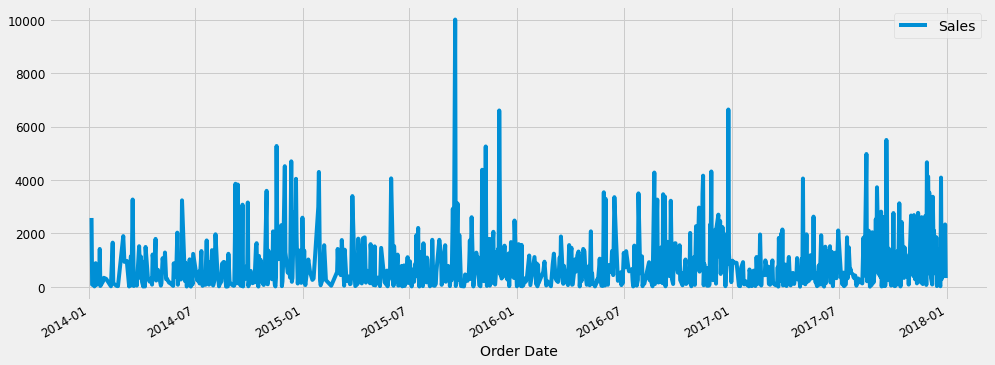

In [12]:
furniture.plot(figsize=(15,6))
plt.show()

In [13]:
y=furniture["Sales"].resample("MS").mean()
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

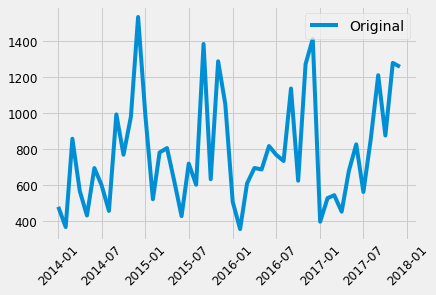

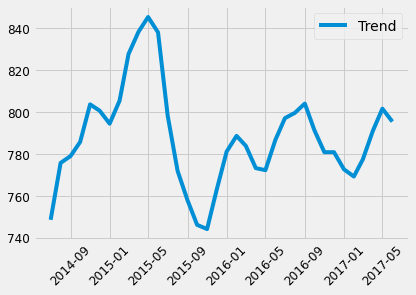

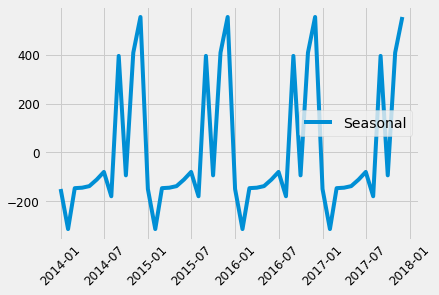

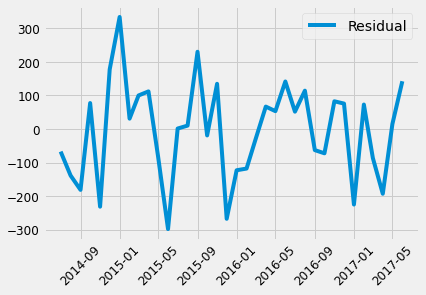

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(y)
plt.plot(y,label="Original")
plt.xticks(rotation=45)
plt.legend(loc="best")

trend=decomposition.trend
plt.show()
plt.plot(trend,label="Trend")
plt.xticks(rotation=45)
plt.legend(loc="best")

seasonal=decomposition.seasonal
plt.show()
plt.plot(seasonal,label="Seasonal")
plt.xticks(rotation=45)
plt.legend(loc="best")

residual=decomposition.resid
plt.show()
plt.plot(residual,label="Residual")
plt.xticks(rotation=45)
plt.legend(loc="best")

In [20]:
#statinority
from statsmodels.tsa.stattools import adfuller
result=adfuller(y)
print("ADF statistic:%f" % result[0])
print("p_value:%f" % result[1])
print("Cirtical Values:")
for key,value in result[4].items():
    print("\t%s:%.3f" % (key,value))

ADF statistic:-5.191070
p_value:0.000009
Cirtical Values:
	1%:-3.621
	5%:-2.944
	10%:-2.610


In [21]:
#Time series Forecasting in ARIMA
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print("Example of parameter combinations for Seasonal ARIMA...")
print("SARIMAX:{} x {}".format(pdq[1],seasonal_pdq[1]))
print("SARIMAX:{} x {}".format(pdq[1],seasonal_pdq[2]))
print("SARIMAX:{} x {}".format(pdq[2],seasonal_pdq[3]))
print("SARIMAX:{} x {}".format(pdq[2],seasonal_pdq[4]))

Example of parameter combinations for Seasonal ARIMA...
SARIMAX:(0, 0, 1) x (0, 0, 1, 12)
SARIMAX:(0, 0, 1) x (0, 1, 0, 12)
SARIMAX:(0, 1, 0) x (0, 1, 1, 12)
SARIMAX:(0, 1, 0) x (1, 0, 0, 12)


In [24]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order = param_seasonal,
enforce_stationarity = False,
enforce_invertibility = False)
            result = mod.fit()
            print("ARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1374.2942560689369
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309212006
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793683
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:977.4114391755996
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.00471991163414
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280302707
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758101


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2613.406405126096
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809157
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673276


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5228339304702
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2440.0997862338
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946866
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.87255764357354
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1197.8112674437089
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.6378567269463
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.9671228167961
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1325.8976991150942
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.9113200151484
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176816732


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2023.5282991417089
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.87055484829773
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806233403544
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774427394


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2440.716600586667
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.7574368417335
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.55766214612373
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067713


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1402.0758375032106
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.4632147852136
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.2077675160944
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935203


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1174.6261016070855
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084619
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.5842692143805
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442185906


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2403.8269376526514
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.36851958158263
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.3422193965908
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238773184


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2334.0894916948073
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002137865
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.75131881245653
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1373.6940736819536
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.20034222811347
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.21306116190993
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658786006
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1428.9896695327855
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345395
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.326499250675
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835552


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:355.7040777815686
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.47626876096973
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.38730069393665
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546608864


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1998.3304762952805
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.7875439541878
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.3661038664475


In [48]:
od=[]
pa=[]
aic=[]


from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order = param_seasonal,
enforce_stationarity = False,
enforce_invertibility = False)
            result = mod.fit()
            print("ARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, result.aic))
            od.append(param)
            pa.append(param_seasonal)
            aic.append(result.aic)
           
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1374.2942560689369
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309212006


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793683
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:977.4114391755996
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.00471991163414
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280302707
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758101


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2613.406405126096
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809157
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673276


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5228339304702
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2440.0997862338
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946866
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.87255764357354
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1197.8112674437089
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.6378567269463
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.9671228167961
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1325.8976991150942
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.9113200151484
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176816732


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2023.5282991417089
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.87055484829773
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806233403544
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774427394


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2440.716600586667
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.7574368417335
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.55766214612373
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067713


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1402.0758375032106
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.4632147852136
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.2077675160944
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935203


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1174.6261016070855
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084619
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.5842692143805
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442185906


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2403.8269376526514
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.36851958158263
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.3422193965908
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238773184


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2334.0894916948073
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002137865
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.75131881245653
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1373.6940736819536
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.20034222811347
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.21306116190993
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658786006
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1428.9896695327855
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345395
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.326499250675
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835552


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:355.7040777815686
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.47626876096973
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.38730069393665
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546608864


C:\Users\SAYYA\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1998.3304762952805
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.7875439541878
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.3661038664475


In [51]:
minl=aic.index(min(aic))
odr=od[minl]
se=pa[minl]
print(minl,odr,se)

27 (0, 1, 1) (0, 1, 1, 12)


In [41]:
mod = sm.tsa.statespace.SARIMAX(y,
                            order=(1,1,1),
                            seasonal_order=(1,1,1,12),
                            enforce_invertibility=False)
result=mod.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0854      0.240      0.356      0.722      -0.385       0.556
ma.L1         -1.0000   3197.336     -0.000      1.000   -6267.663    6265.663
ar.S.L12       0.0274      0.512      0.053      0.957      -0.977       1.032
ma.S.L12      -1.0001   3196.993     -0.000      1.000   -6266.992    6264.991
sigma2      2.715e+04      0.050   5.38e+05      0.000    2.71e+04    2.71e+04


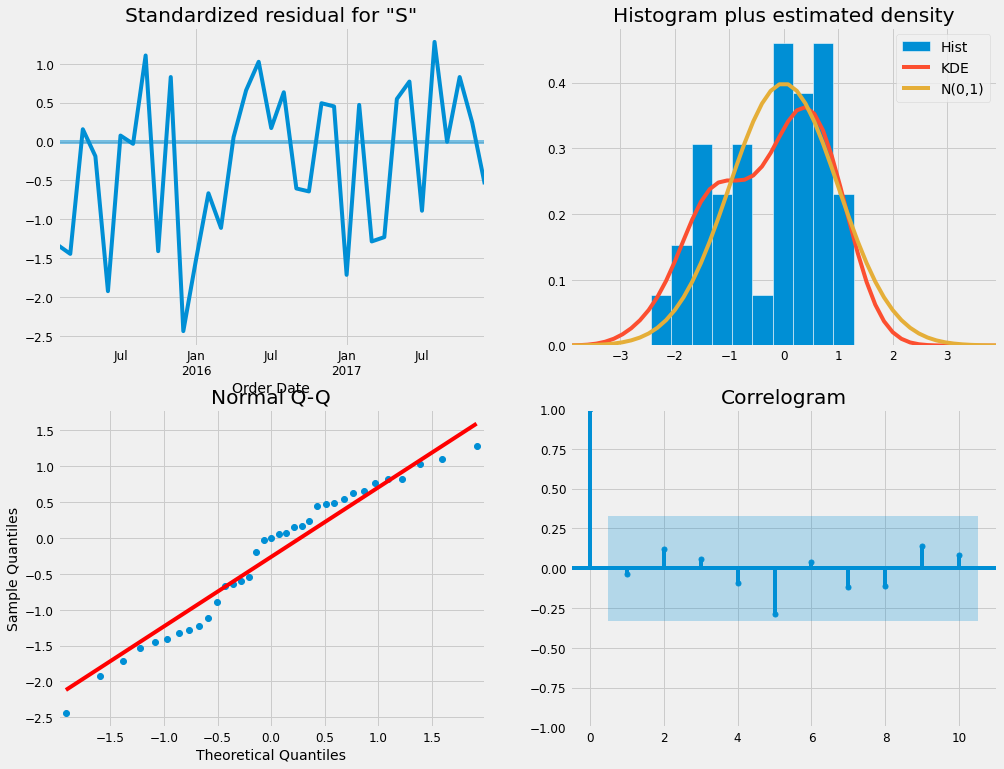

In [42]:
result.plot_diagnostics(figsize=(15,12))
plt.show()

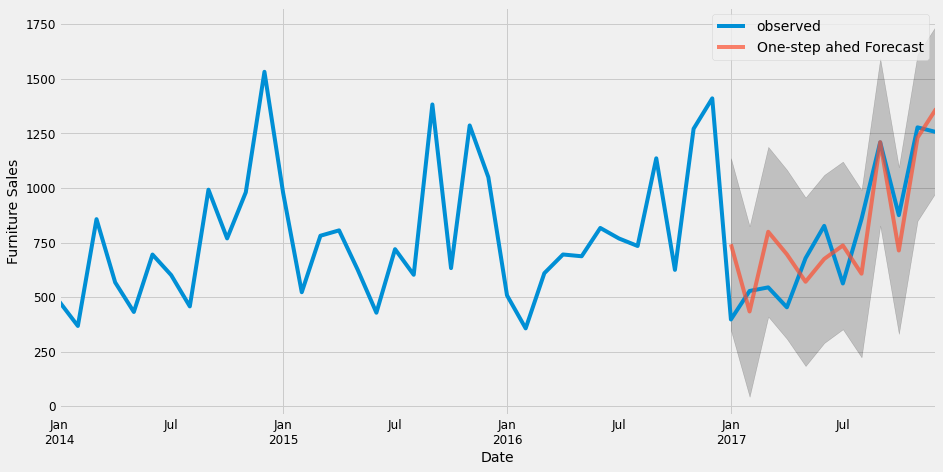

In [43]:
pred=result.get_prediction(start=pd.to_datetime("2017-01-01"),dynamic=False)
pred_ci=pred.conf_int()
ax=y["2014":].plot(label="observed")
pred.predicted_mean.plot(ax=ax,label="One-step ahed Forecast",alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],color="k",alpha=.2)
ax.set_xlabel("Date")
ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()

In [44]:
y_forecasted=pred.predicted_mean
y_truth=y["2017-01-01":]
mse=((y_forecasted-y_truth)**2).mean()
print("The Mean Squared Error of our forcecasts is {}".format(round(mse,2)))
print("The Root Mean Squared Error of our forcecasts is {}".format(round(np.sqrt(mse),2)))

The Mean Squared Error of our forcecasts is 34904.03
The Root Mean Squared Error of our forcecasts is 186.83


            lower Sales  upper Sales
2018-01-01   250.479989  1000.538581
2018-02-01   116.186268   872.709995
2018-03-01   359.961522  1116.864802
2018-04-01   291.950001  1048.885184
2018-05-01   275.399690  1032.337681
2018-06-01   363.459519  1120.397761
2018-07-01   327.346803  1084.285089
2018-08-01   338.748709  1095.687181
2018-09-01   842.470298  1599.410429
2018-10-01   403.477208  1160.432253
2018-11-01   869.496959  1626.582484
2018-12-01   964.042828  1721.830974
2019-01-01   260.071021  1052.380010


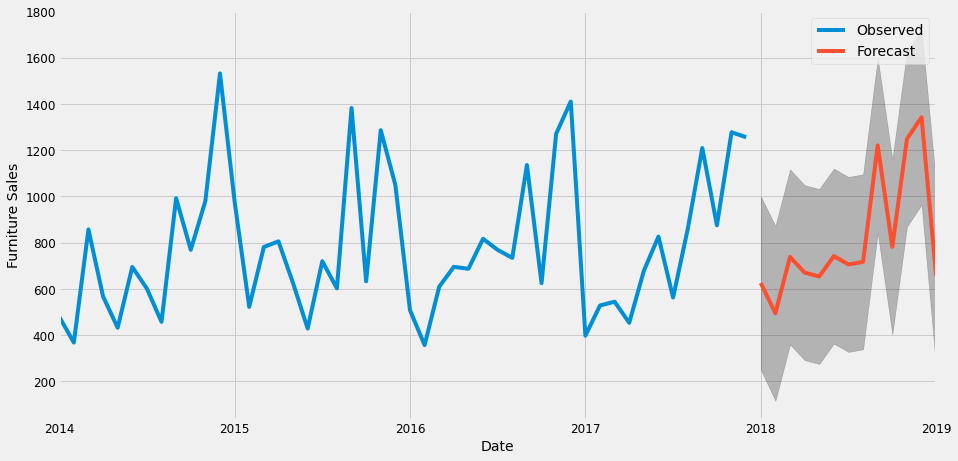

In [45]:
pred_uc = result.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label="Observed", figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label="Forecast")
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color="k", alpha=.25)
ax.set_xlabel("Date")
ax.set_ylabel("Furniture Sales")
print(pred_ci)
plt.legend()
plt.show()

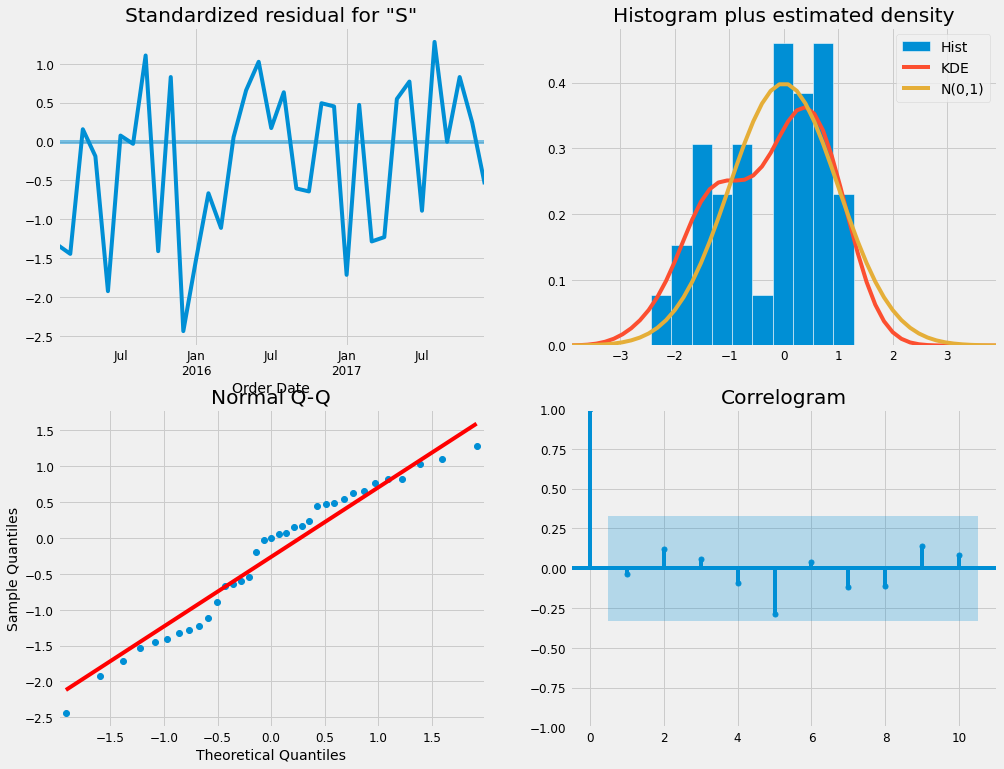

In [46]:
result.plot_diagnostics(figsize=(15,12))
plt.show()